In [1]:
#Importing Reauired Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Ratings=pd.read_csv('Reviews.csv',encoding='latin-1') #Loding the datasets
Ratings.head() #print the data

,Unnamed: 0,Ratings,Full_review
0,0,5,This is the best laptop in this range.I reciev...
1,1,5,Good product as used of now.... Everything is ...
2,2,5,AWESOME LAPTOP. It supports many high spec gam...
3,3,4,For that price... it's exceptionally good. Pla...
4,4,4,RAM upgrade is must do because the useable RAM...


In [3]:
#dropping the Unnamed: 0 column
Ratings.drop('Unnamed: 0', axis =1, inplace = True)  #dropping the data

In [4]:
Ratings.shape    #Checking dimension

(36396, 2)

Observation :
    there are 36396 rows and 2 columns in given datsets.

In [5]:
print('Ratings counts','\n',Ratings.Ratings.value_counts())

Ratings counts 
 5    20178
4     6367
1     5439
3     2768
2     1644
Name: Ratings, dtype: int64


Observation:




Maximum, 20178 number of ratings present is of 5 star and minimum, 1644 is of 2 star.

<AxesSubplot:xlabel='Ratings', ylabel='count'>

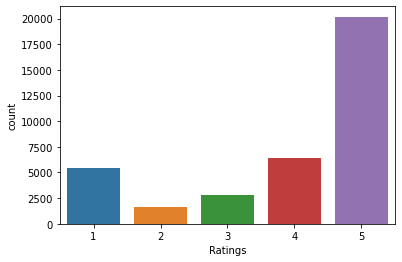

In [6]:
sns.countplot(Ratings['Ratings'])

In [7]:
def plot_labels(Ratings, title=None):
  ds_labels = Ratings["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(10,5))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

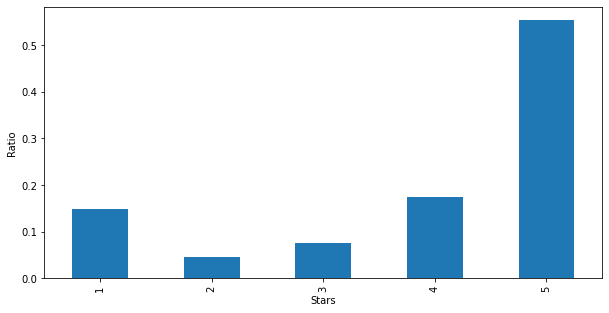

In [8]:
plot_labels(Ratings, "stars")  #show tables

we can observe that data is imbalence.

In [9]:
Ratings['length']=Ratings.Full_review.str.len()
Ratings.head()

,Ratings,Full_review,length
0,5,This is the best laptop in this range.I reciev...,500
1,5,Good product as used of now.... Everything is ...,271
2,5,AWESOME LAPTOP. It supports many high spec gam...,96
3,4,For that price... it's exceptionally good. Pla...,342
4,4,RAM upgrade is must do because the useable RAM...,502


Here we create another column length based on the length of reviews.

In [10]:
Ratings.info()  # Checking information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36396 entries, 0 to 36395
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      36396 non-null  int64 
 1   Full_review  36396 non-null  object
 2   length       36396 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 853.2+ KB


In [11]:
Ratings.isnull().sum()  #Checking the null values in given datasets.

Ratings        0
Full_review    0
length         0
dtype: int64

<AxesSubplot:>

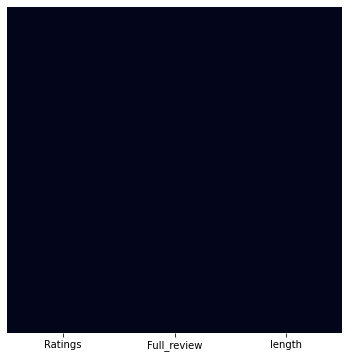

In [12]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(6,6))
sns.heatmap(Ratings.isnull(),yticklabels=False,cbar=False)

Observation:
    
    
    

Thus we confirm that there are no missing values present in our dataset.

In [13]:
#convert text to lowercase
Ratings['Full_review']=Ratings['Full_review'].str.lower()

In [14]:
Ratings['Full_review']=Ratings['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Ratings['Full_review']=Ratings['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Ratings['Full_review']=Ratings['Full_review'].str.replace(r'£|\$', 'dollers')

Ratings['Full_review']=Ratings['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Ratings['Full_review']=Ratings['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
#remove punctuation
Ratings['Full_review']=Ratings['Full_review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Ratings['Full_review']=Ratings['Full_review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Ratings['Full_review']=Ratings['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [16]:
Ratings.head()

,Ratings,Full_review,length
0,5,this is the best laptop in this range i reciev...,500
1,5,good product as used of now everything is good...,271
2,5,awesome laptop it supports many high spec game...,96
3,4,for that price it s exceptionally good played ...,342
4,4,ram upgrade is must do because the useable ram...,502


In [17]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

In [18]:
stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

Ratings['Full_review'] = Ratings['Full_review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [19]:
Ratings['clean_length'] = Ratings.Full_review.str.len()

In [20]:
Ratings.head()

,Ratings,Full_review,length,clean_length
0,5,best laptop range recieved late delivery due b...,500,337
1,5,good product used everything good also ssd slo...,271,150
2,5,awesome laptop supports many high spec games l...,96,84
3,4,price exceptionally good played far cry numbr ...,342,254
4,4,ram upgrade must useable ram numbrgb ryzen num...,502,393


In [21]:
print('original Review length', Ratings.length.sum())
print('clean Review length', Ratings.clean_length.sum())

original Review length 1980795
clean Review length 1415737


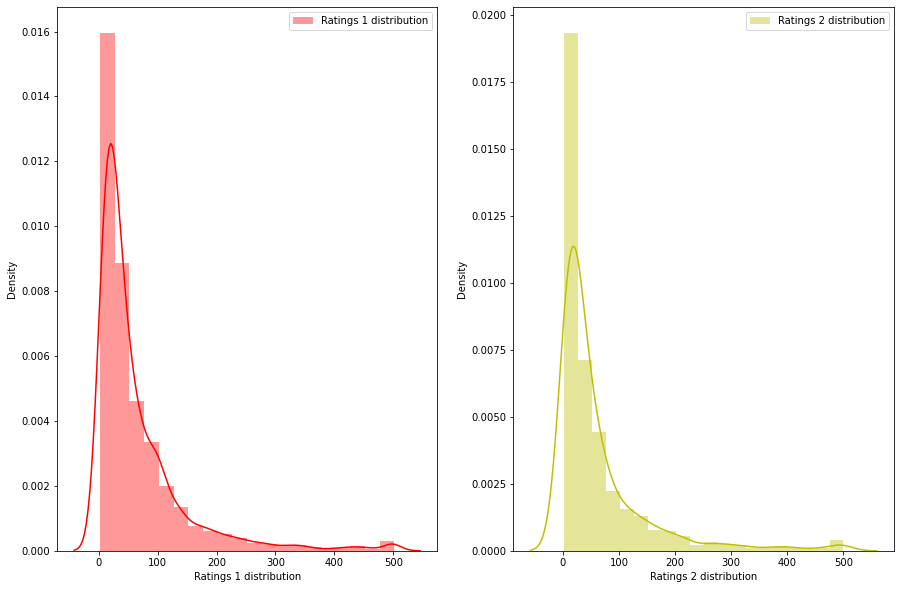

In [22]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(15,10))

sns.distplot(Ratings[Ratings['Ratings']==1]['length'],bins=20,ax=ax[0],label='Ratings 1 distribution',color='r')
ax[0].set_xlabel('Ratings 1 distribution')
ax[0].legend()

sns.distplot(Ratings[Ratings['Ratings']==2]['length'],bins=20,ax=ax[1],label='Ratings 2 distribution',color='y')
ax[1].set_xlabel('Ratings 2 distribution')
ax[1].legend()

plt.show()

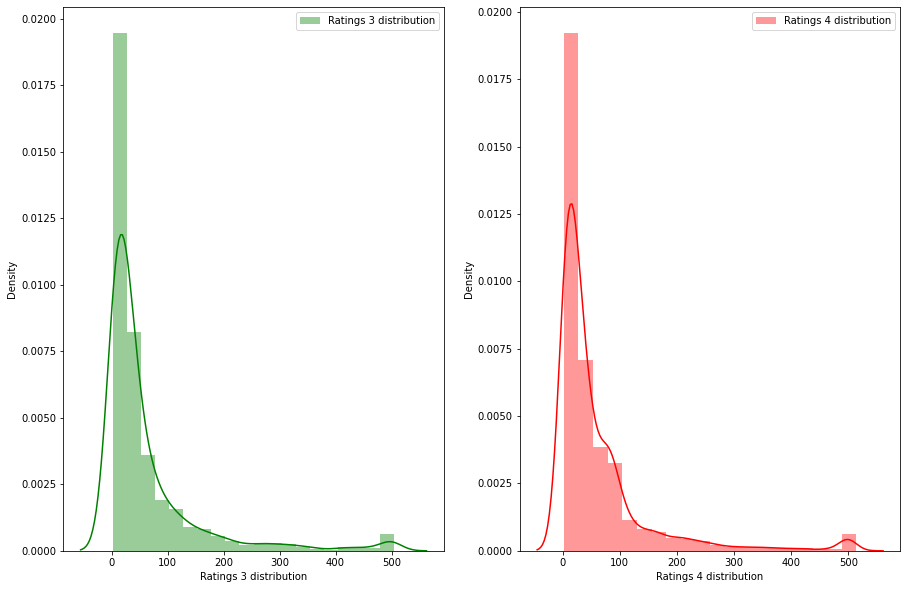

In [23]:
f,ax = plt.subplots(1,2,figsize=(15,10))

sns.distplot(Ratings[Ratings['Ratings']==3]['length'],bins=20,ax=ax[0],label='Ratings 3 distribution',color='g')
ax[0].set_xlabel('Ratings 3 distribution')
ax[0].legend()

sns.distplot(Ratings[Ratings['Ratings']==4]['length'],bins=20,ax=ax[1],label='Ratings 4 distribution',color='r')
ax[1].set_xlabel('Ratings 4 distribution')
ax[1].legend()

plt.show()

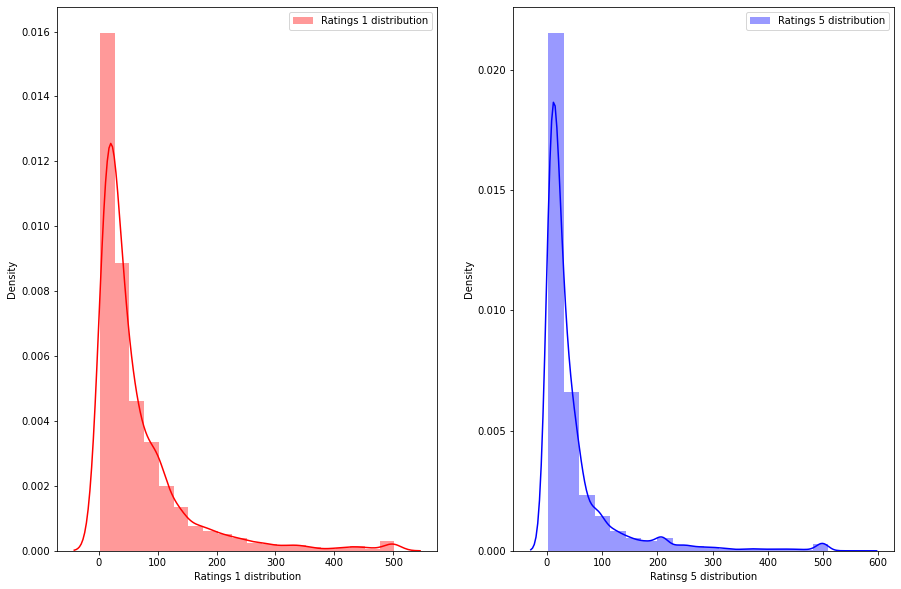

In [24]:
f,ax = plt.subplots(1,2,figsize=(15,10))

sns.distplot(Ratings[Ratings['Ratings']==1]['length'],bins=20,ax=ax[0],label='Ratings 1 distribution',color='r')
ax[0].set_xlabel('Ratings 1 distribution')
ax[0].legend()

sns.distplot(Ratings[Ratings['Ratings']==5]['length'],bins=20,ax=ax[1],label='Ratings 5 distribution',color='b')
ax[1].set_xlabel('Ratinsg 5 distribution')
ax[1].legend()

plt.show()

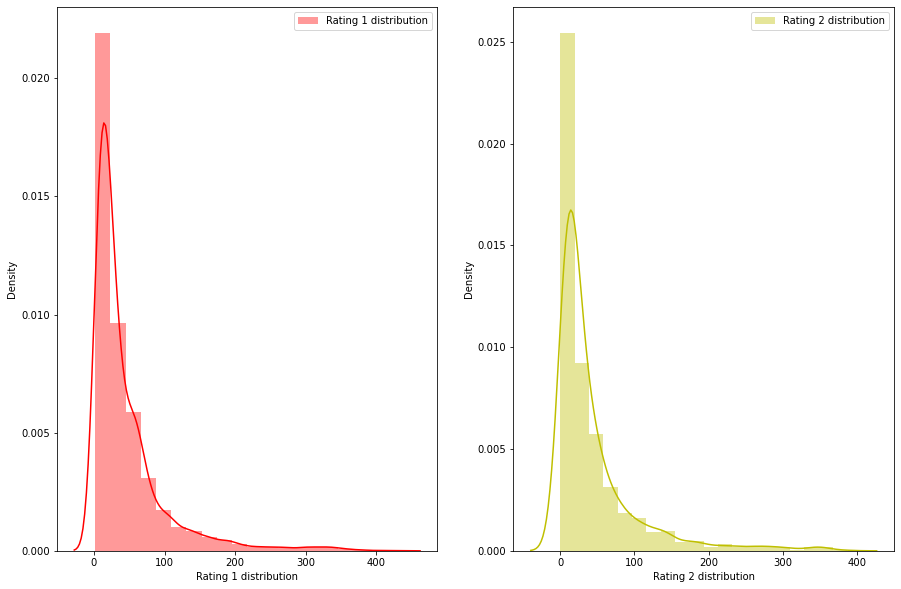

In [25]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(15,10))

sns.distplot(Ratings[Ratings['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Ratings[Ratings['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

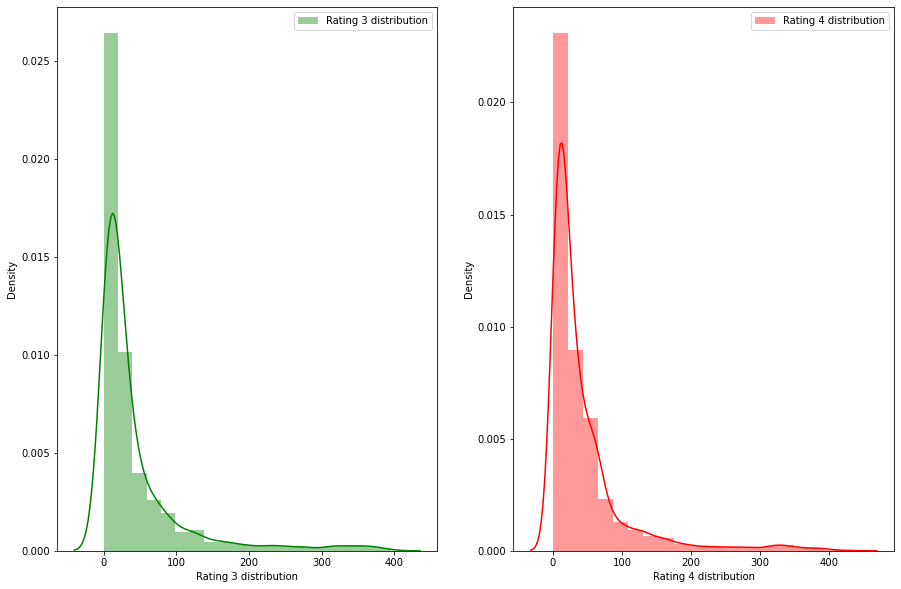

In [26]:
f,ax = plt.subplots(1,2,figsize=(15,10))

sns.distplot(Ratings[Ratings['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Ratings[Ratings['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

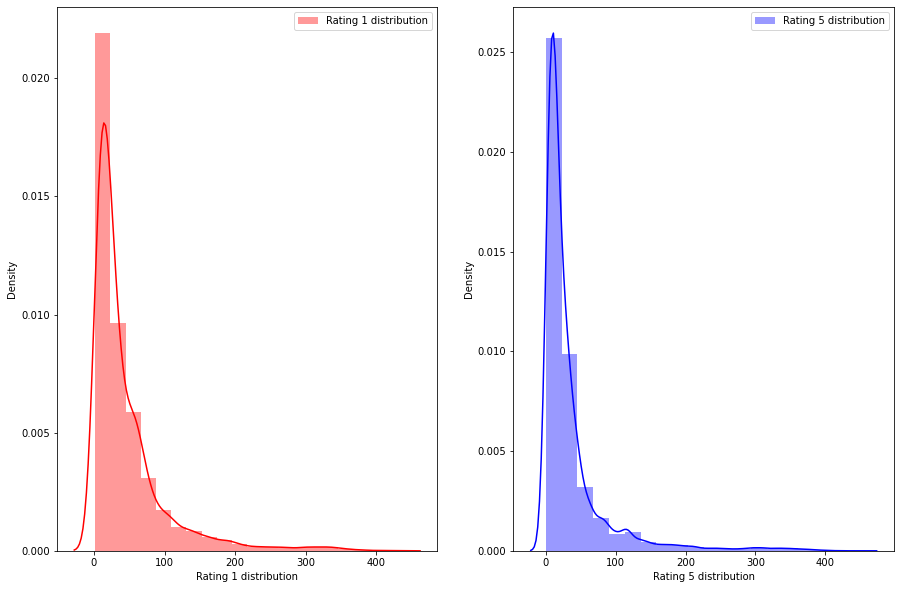

In [27]:
f,ax = plt.subplots(1,2,figsize=(15,10))

sns.distplot(Ratings[Ratings['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Ratings[Ratings['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

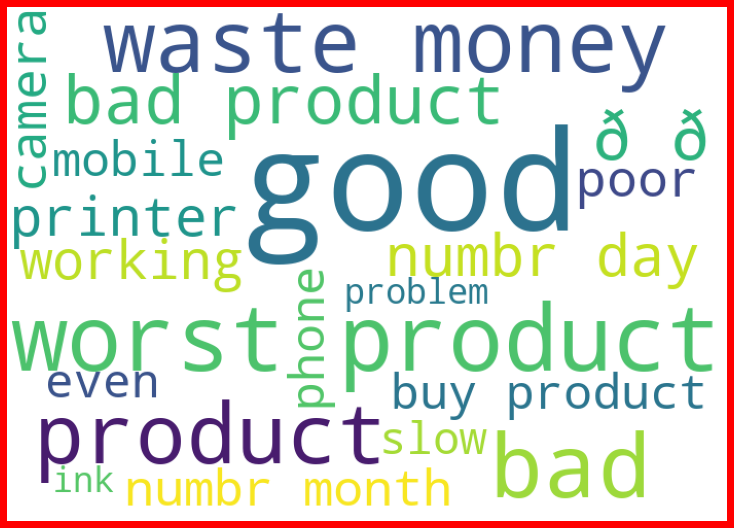

In [28]:
#getting sense of review Loud words in Ratings 1
from wordcloud import WordCloud

Rating1=Ratings['Full_review'][Ratings['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

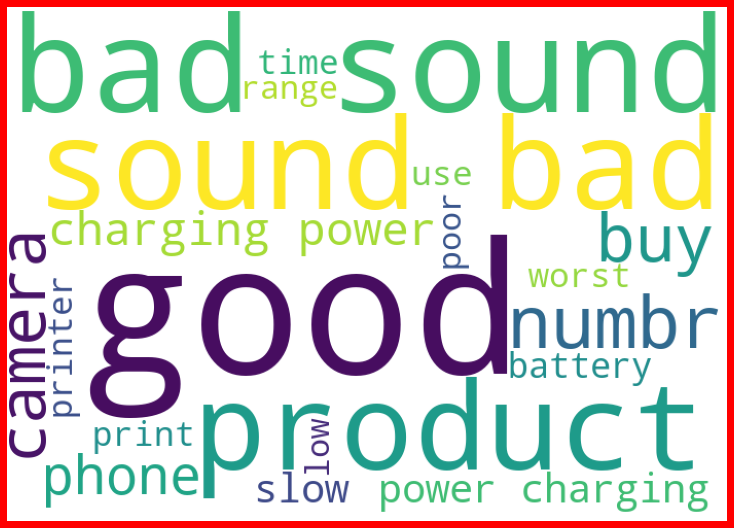

In [29]:
#getting sense of review Loud words in Rating 2

Rating2=Ratings['Full_review'][Ratings['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

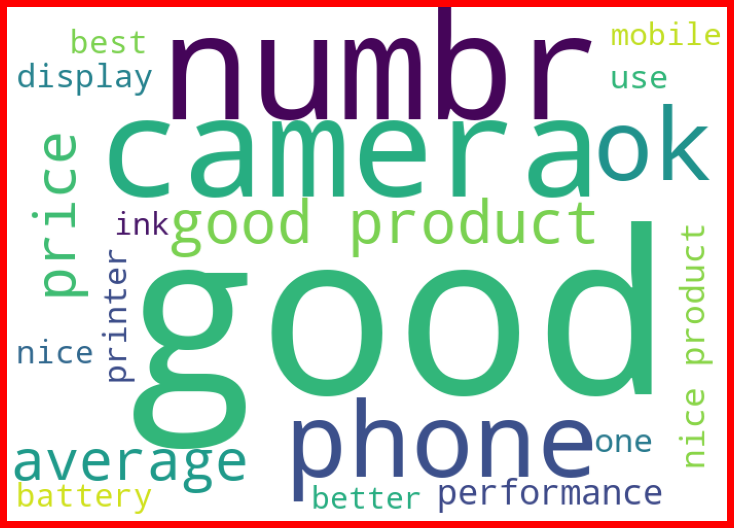

In [30]:
#getting sense of review Loud words in Rating 3

Rating3=Ratings['Full_review'][Ratings['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

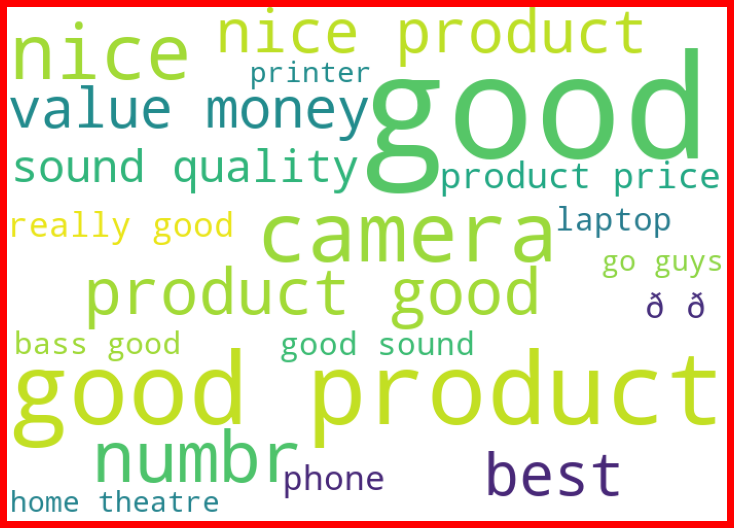

In [31]:
#getting sense of review Loud words in Rating 4

Rating4=Ratings['Full_review'][Ratings['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

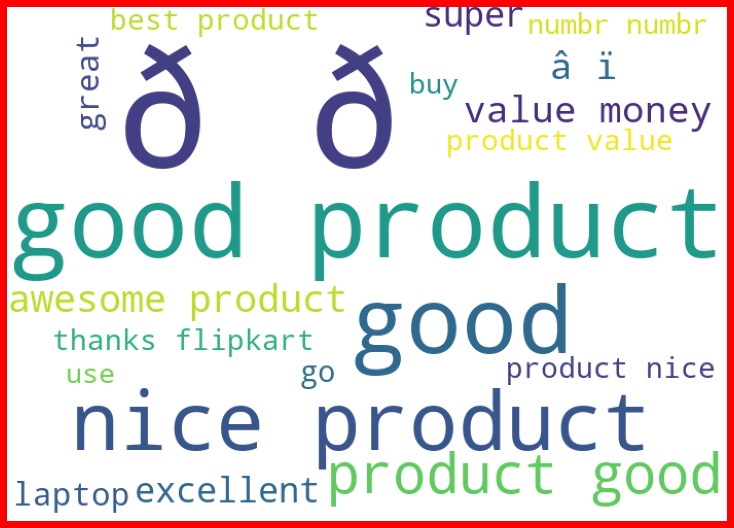

In [32]:
#getting sense of review Loud words in Rating 5

Rating5=Ratings['Full_review'][Ratings['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Ratings['Full_review'])

In [34]:
feature1

<36396x9856 sparse matrix of type '<class 'numpy.float64'>'
	with 201337 stored elements in Compressed Sparse Row format>

In [35]:
x=feature1

In [36]:
x=Ratings['Full_review']
y=Ratings['Ratings']

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [38]:
tf=TfidfVectorizer(analyzer='word')
cv=CountVectorizer()

In [39]:
X=tf.fit_transform(Ratings['Full_review'])

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

# Apply Different Model

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
naive=MultinomialNB()

In [42]:
clf2=OneVsRestClassifier(naive)
clf2.fit(x_train,y_train)
y_pred_nv=clf2.predict(x_test)
print('Train Score',clf2.score(x_train,y_train)*100)
print('Accuracy_Score',accuracy_score(y_test,y_pred_nv)*100)
print('f1 score',f1_score(y_test,y_pred_nv,average='weighted')*100)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_nv))
print('Classification_Report\n',classification_report(y_test,y_pred_nv))

Train Score 70.35757742277349
Accuracy_Score 67.82672405897976
f1 score 59.69681185578146
Confusion Matrix
 [[1098    0    2   12  442]
 [ 267   29    2   12  179]
 [ 149    0   38   39  593]
 [  62    0    4  223 1593]
 [  84    0    5   68 6018]]
Classification_Report
               precision    recall  f1-score   support

           1       0.66      0.71      0.68      1554
           2       1.00      0.06      0.11       489
           3       0.75      0.05      0.09       819
           4       0.63      0.12      0.20      1882
           5       0.68      0.97      0.80      6175

    accuracy                           0.68     10919
   macro avg       0.74      0.38      0.38     10919
weighted avg       0.69      0.68      0.60     10919



In [43]:
lg=LogisticRegression()
clf1=OneVsRestClassifier(lg)
clf1.fit(x_train,y_train)
y_pred_lg=clf1.predict(x_test)
print('Train Score',clf2.score(x_train,y_train)*100)
print('Accuracy_Score',accuracy_score(y_test,y_pred_lg)*100)
print('f1 score',f1_score(y_test,y_pred_lg,average='weighted')*100)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_lg))
print('Classification_Report\n',classification_report(y_test,y_pred_lg))

Train Score 70.35757742277349
Accuracy_Score 70.1987361479989
f1 score 64.4931649853163
Confusion Matrix
 [[1213   20   21   20  280]
 [ 229   93   19   18  130]
 [ 170    7   85   69  488]
 [  72    2   32  369 1407]
 [  93    4   17  156 5905]]
Classification_Report
               precision    recall  f1-score   support

           1       0.68      0.78      0.73      1554
           2       0.74      0.19      0.30       489
           3       0.49      0.10      0.17       819
           4       0.58      0.20      0.29      1882
           5       0.72      0.96      0.82      6175

    accuracy                           0.70     10919
   macro avg       0.64      0.45      0.46     10919
weighted avg       0.67      0.70      0.64     10919



In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

clf=OneVsRestClassifier(dtc)
clf.fit(x_train,y_train)
y_pred_dtc=clf.predict(x_test)
print('Train Score',clf2.score(x_train,y_train)*100)
print('Accuracy_Score',accuracy_score(y_test,y_pred_dtc)*100)
print('f1 score',f1_score(y_test,y_pred_dtc,average='weighted')*100)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_dtc))
print('Classification_Report\n',classification_report(y_test,y_pred_dtc))

Train Score 70.35757742277349
Accuracy_Score 67.15816466709406
f1 score 62.20733587896794
Confusion Matrix
 [[ 945   81   60   53  415]
 [ 156  107   36   24  166]
 [ 107   25  101   68  518]
 [  51   14   47  368 1402]
 [  78   19   59  207 5812]]
Classification_Report
               precision    recall  f1-score   support

           1       0.71      0.61      0.65      1554
           2       0.43      0.22      0.29       489
           3       0.33      0.12      0.18       819
           4       0.51      0.20      0.28      1882
           5       0.70      0.94      0.80      6175

    accuracy                           0.67     10919
   macro avg       0.54      0.42      0.44     10919
weighted avg       0.63      0.67      0.62     10919

